# Bilayer Graphene

In [167]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Literal

# Energy Bands

In [168]:
def bands(kx: float | np.ndarray, ky: float | np.ndarray, alpha: Literal[-1, 1], sign: Literal[-1, 1]) -> float | np.ndarray:
    """
    Compute E_{±}^{(alpha)}(k) for bilayer graphene energy spectrum.
    
    Parameters:
        kx (float): k_x component of wavevector
        ky (float): k_y component of wavevector
        alpha (int): -1 or +1
        sign (int): -1 or +1 (for ± branch)
        
    Returns:
        float: Energy E_{±}^{(alpha)}(k)
    """

    # Constants (length in units of the lattice parameter and energy in units of t)
    a = 1
    t = 1
    t_perp = 0.1

    # Calculate |f(k)|^2
    term1 = 3
    term2 = 2 * np.cos(np.sqrt(3) * a * kx)
    term3 = 4 * np.cos((np.sqrt(3) / 2) * a * kx) * np.cos((3 / 2) * a * ky)
    f_squared = term1 + term2 + term3

    # Compute the energy
    energy = sign * (t_perp / 2) * (np.sqrt(1 + (4 * t**2 / t_perp**2) * f_squared) + alpha)
    
    return energy


def bandseff(qx: float | np.ndarray, qy: float | np.ndarray, sign: Literal[-1, 1], U: float) -> float | np.ndarray:
    """
    Compute E_{±}(q) for bilayer graphene effective two-band energy spectrum (possibly biased).
    
    Parameters:
        qx (float): q_x component of wavevector
        qy (float): q_y component of wavevector
        alpha (int): -1 or +1
        U (float): bias
        
    Returns:
        float: Energy E_{±}(q)
    """

    # Constants (length in units of the lattice parameter and energy in units of t)
    a = 1
    t = 1
    t_perp = 0.1

    # Calculate q^2
    q2 = qx**2 + qy**2
    Eq = (9/4) * t**2 * a**2 * q2 / t_perp

    # Compute the energy
    energy = sign * np.sqrt(Eq**2 + U**2 * (1 - (2/t_perp) * Eq)**2)
    
    return energy

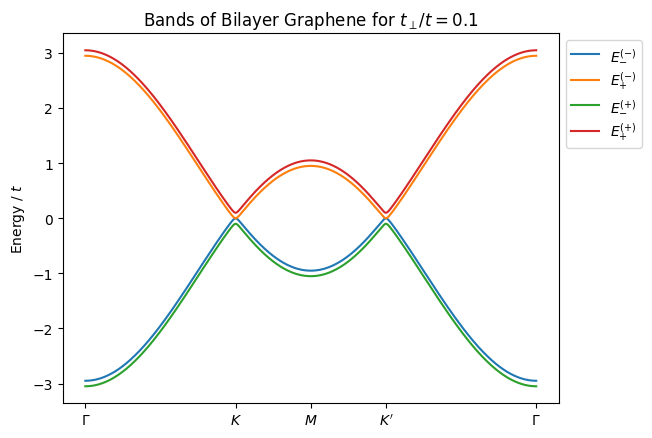

In [169]:
# Trace the path (start at kx = 0 and end at kx given by b1 - b2)
kpoints = 1000

kstart = 0
kend = 4 * np.pi  / np.sqrt(3)

kk = np.linspace(kstart, kend, kpoints)

# Special points
labels_special = ["$\\Gamma$", "$K$", "$M$", "$K'$", "$\\Gamma$"]
coords_special = [0, 4 * np.pi / (3 * np.sqrt(3)), 2 * np.pi / np.sqrt(3), 8 * np.pi  / (3 * np.sqrt(3)), 4 * np.pi  / np.sqrt(3)]

# Plot the bands
plt.title("Bands of Bilayer Graphene for $t_\\perp / t = 0.1$")
for alpha in [-1, +1]:
    for sign in [-1, +1]:
        ee = bands(kk, np.zeros_like(kk), alpha, sign)
        plt.plot(kk, ee, label=f"$E_{{{"+" if sign == 1 else "-"}}}^{{({("+" if alpha == 1 else "-")})}}$")
        

# Set custom x-tick labels at specific positions
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(coords_special, labels_special)
plt.ylabel("Energy / $t$")
plt.show()

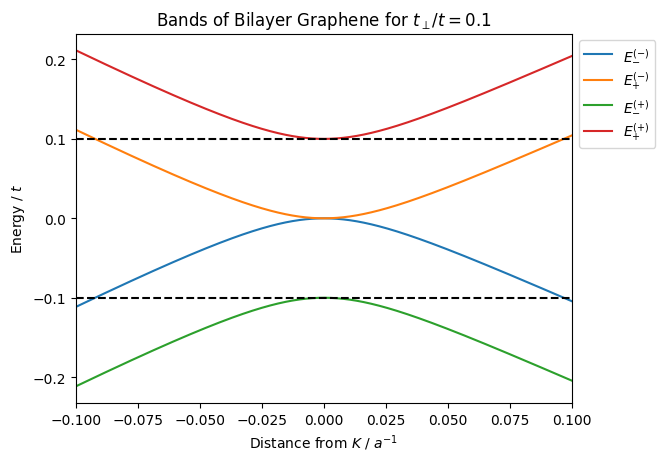

In [170]:
# Close-up near K
kpoints = 1000

kdirac = coords_special[1]
kstart = kdirac - 0.1
kend = kdirac + 0.1

kk = np.linspace(kstart, kend, kpoints)

# Plot the bands
plt.title("Bands of Bilayer Graphene for $t_\\perp / t = 0.1$")
for alpha in [-1, +1]:
    for sign in [-1, +1]:
        ee = bands(kk, np.zeros_like(kk), alpha, sign)
        plt.plot(kk - kdirac, ee, label=f"$E_{{{"+" if sign == 1 else "-"}}}^{{({("+" if alpha == 1 else "-")})}}$")
        

# Important points
t_perp = 0.1
plt.hlines([-t_perp, t_perp], kstart - kdirac, kend - kdirac, colors="black", linestyles="dashed")
plt.xlim(kstart - kdirac, kend - kdirac)

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Distance from $K$ / $a^{-1}$")
plt.ylabel("Energy / $t$")
plt.show()

## Effective Two-Band Hamiltonian

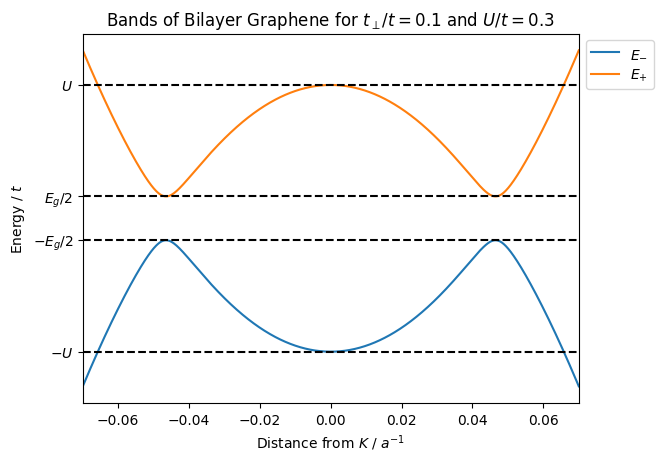

In [171]:
# Parameters
U = 0.3
qpoints = 1000

# Plot the bands
qstart = -0.07
qend = 0.07

qq = np.linspace(qstart, qend, qpoints)

plt.title(f"Bands of Bilayer Graphene for $t_\\perp / t = 0.1$ and $U / t = {U}$")
for sign in [-1, +1]:
    ee = bandseff(qq, np.zeros_like(qq), sign, U)
    plt.plot(qq, ee, label=f"$E_{{{"+" if sign == 1 else "-"}}}$")

        
# Set custom y-tick labels at specific positions
t_perp = 0.1
Eg = 2 * U * np.sqrt(1 / (1 + 4 * U**2 / t_perp**2))
plt.yticks([-U, -Eg/2, Eg/2, +U], ["$-U$", "$-E_g/2$", "$E_g/2$", "$U$"])
plt.hlines([-U, -Eg/2, Eg/2, +U], qstart * 1, qend * 1, colors="black", linestyles="dashed")
plt.xlim(qstart, qend)

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Distance from $K$ / $a^{-1}$")
plt.ylabel("Energy / $t$")
plt.show()